In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, normalize, RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
import numpy as np
import matplotlib as pyplot
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_excel("Student-Employability-Datasets.xlsx")

In [3]:
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [4]:
df.nunique()

Name of Student               2982
GENERAL APPEARANCE               4
MANNER OF SPEAKING               4
PHYSICAL CONDITION               4
MENTAL ALERTNESS                 4
SELF-CONFIDENCE                  4
ABILITY TO PRESENT IDEAS         4
COMMUNICATION SKILLS             4
Student Performance Rating       3
CLASS                            2
dtype: int64

In [5]:
df.shape

(2982, 10)

In [6]:
df["CLASS"] = df["CLASS"].replace(to_replace=["Employable", "LessEmployable"], value=[1,0])
df["Student Performance Rating"].drop

C:\Users\ML_USER\AppData\Local\Temp\ipykernel_14740\968701943.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CLASS"] = df["CLASS"].replace(to_replace=["Employable", "LessEmployable"], value=[1,0])


<bound method Series.drop of 0       5
1       5
2       5
3       5
4       5
       ..
2977    5
2978    5
2979    5
2980    5
2981    5
Name: Student Performance Rating, Length: 2982, dtype: int64>

In [10]:
X.skew()

GENERAL APPEARANCE         -0.135300
MANNER OF SPEAKING          0.309568
PHYSICAL CONDITION          0.208199
MENTAL ALERTNESS            0.138293
SELF-CONFIDENCE             0.272444
ABILITY TO PRESENT IDEAS    0.337570
COMMUNICATION SKILLS        0.693901
TOTAL_SCORE                 0.228009
dtype: float64

In [64]:
X = df.iloc[:,1:8]
y = df["CLASS"]
X["TOTAL_SCORE"] = X.sum(axis=1)
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
#X_train_np = np.log1p(X_train.to_numpy())
#X_test_np = np.log1p(X_test.to_numpy())
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y.value_counts()

CLASS
1    1729
0    1253
Name: count, dtype: int64

In [92]:
model = Sequential()
model.add(InputLayer(shape=[X_train_scaled.shape[1],]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=3e-3),loss='BinaryCrossentropy', metrics=['accuracy'])

In [94]:
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs = 400)

Epoch 1/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5768 - loss: 0.6783 - val_accuracy: 0.6205 - val_loss: 0.6491
Epoch 2/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5906 - loss: 0.6607 - val_accuracy: 0.6373 - val_loss: 0.6343
Epoch 3/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6047 - loss: 0.6516 - val_accuracy: 0.6562 - val_loss: 0.6238
Epoch 4/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 0.6218 - val_accuracy: 0.6667 - val_loss: 0.6089
Epoch 5/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.6088 - val_accuracy: 0.6478 - val_loss: 0.5935
Epoch 6/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.5865 - val_accuracy: 0.6855 - val_loss: 0.5656
Epoch 7/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5498 - val_accuracy: 0.7107 - val_loss: 0.5345
Epoch 8/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: 0.5348 - val_accuracy: 0.7338 - v

In [96]:
y_pred = model(X_test_scaled)
accuracy_score(y_test,np.round(y_pred))

0.8408710217755444

In [56]:
roc_auc_score(y_test, y_pred)

0.9421907744743568

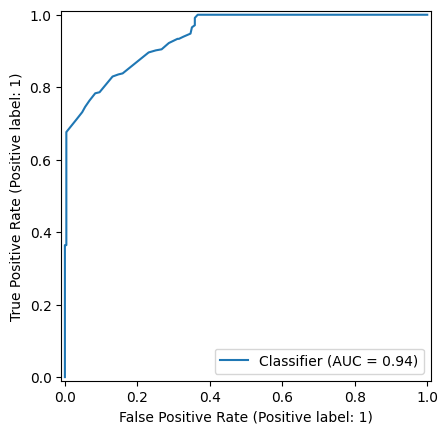

In [25]:
RocCurveDisplay.from_predictions(y_test, y_pred)